# 1. Vorbereitung

In diesem Tutorial beschäftigen wir uns mit der Tatsache, dass Trainings- und Testdaten als Stichproben zu verstehen sind und welchen Einfluss dies auf das Training und die Evaluation eines Modells hat. Dabei lernen wir die Begriff **Overfitting** und **Underfitting** kennen.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

from utils_overfitting import generate_data
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# TODO: Daten generieren und visualisieren

# Option 1
#data = generate_data()

# X = data[0] # Alter
# y = data[1] # Verkaufspreis [Tsd €]

# Option 2
X_train, y_train = generate_data()
X_train

array([[ 3.06408389],
       [16.38966813],
       [ 2.95721419],
       [23.95625586],
       [37.64677442],
       [37.14476254],
       [13.07452392],
       [19.415253  ],
       [14.95211384],
       [10.24336019],
       [38.11853263],
       [ 2.86273026],
       [33.64654872],
       [38.41113167],
       [ 9.49191821],
       [34.5062183 ],
       [17.49132344],
       [24.18682076],
       [19.97952127],
       [ 8.04419258]])

## 2. Zufällige Trainingsdaten

Trainingsdaten, oder allgemein die Daten denen wir begegnen, sind Stichproben einer unbekannten Verteilung, das heißt einer vor uns verborgenen Realität, von der wir nur Ausschnitte wahrnehmen können.

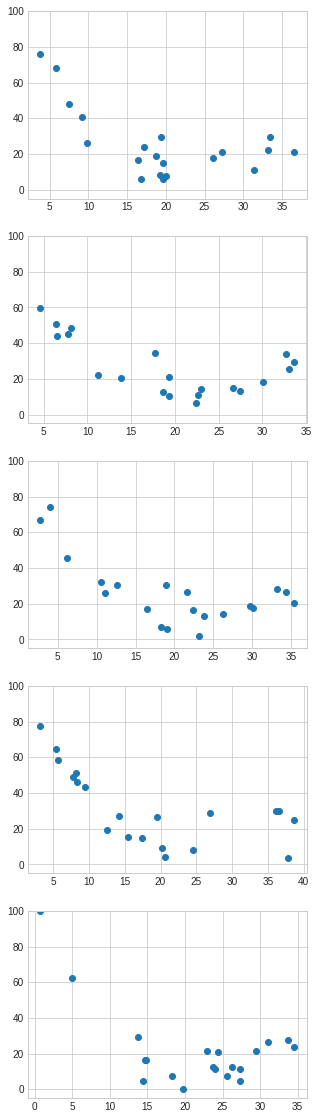

In [3]:
# Anzahl der Wiederholungen der Stichprobe
n_runs = 5

# für Stabilität
plt.close("all")

# neuer Graph
fig = plt.figure(
    figsize=(5, n_runs*4)
)

# Verschiedene Trainingsdaten
for run in range(n_runs):
    
    # TODO: Daten generieren
    x_sample, y_sample = generate_data()
    
    # TODO: Subplot aufrufen
    plt.subplot(n_runs, 1, run + 1)
    
    # TODO Scatterplot
    plt.scatter(x_sample, y_sample)

    plt.ylim(-5, 100)

## 3. Lineare Regression fitten

Dadurch, dass die Trainingsdaten zufällige Stichproben sind, müssen wir auch mit einem verschiedenen Ergebnis rechnen, wenn wir einen Fit/eine Anpassung ausführen, denn diese ist natürlich von den Trainingsdaten abhängig.

In [4]:
# TODO: Visualisierungsfunktion
def visualize_fit(model, color=None):
    x_vis = np.linspace(0, 40, 100)
    y_vis = model.predict(x_vis.reshape(-1, 1))
    plt.plot(x_vis, y_vis, color=color)

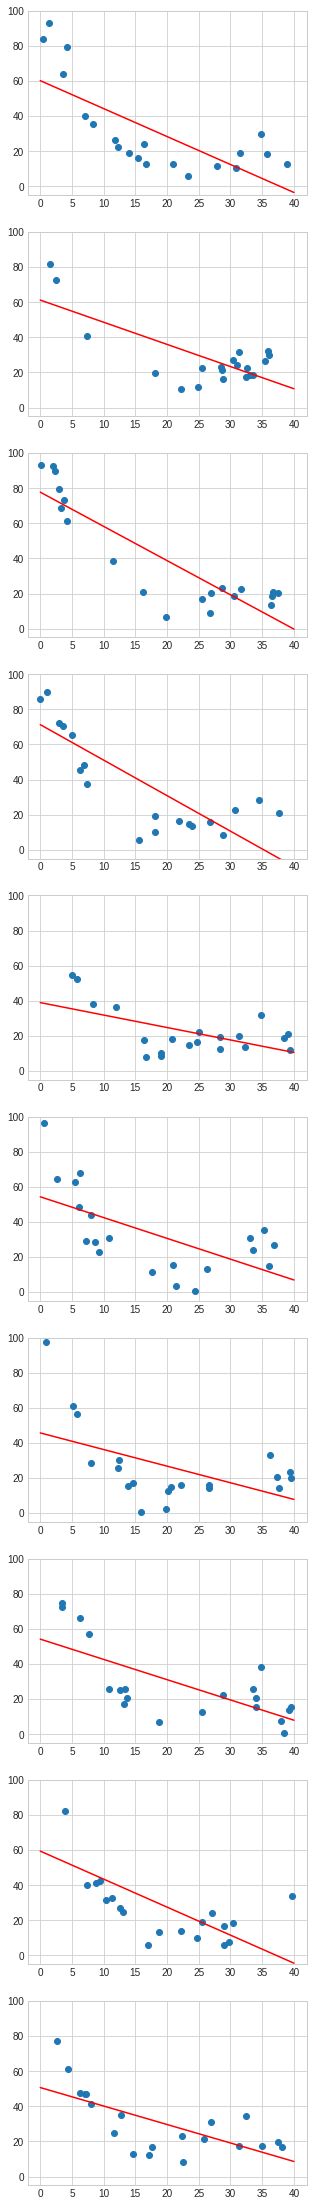

In [5]:
# Anzahl der Wiederholungen der Stichprobe
n_runs = 10

# TODO: Modelle für lineare Regression erstellen
models = []
for run in range(n_runs):
    new_model = LinearRegression()
    models.append(new_model)

# für Stabilität
plt.close("all")

# neuer Graph
fig = plt.figure(
    figsize=(5, n_runs*4)
)

# Verschiedene Trainingsdaten
for run in range(n_runs):
    model = models[run]
    
    # TODO: Daten generieren
    x_sample, y_sample = generate_data()
    
    # TODO: Modell fitten
    model.fit(x_sample, y_sample)
    
    # TODO: Subplot aufrufen
    plt.subplot(n_runs, 1, run + 1)
    
    # TODO Scatterplot
    plt.scatter(x_sample, y_sample)
    
    # TODO: Fit des Modells visualisieren
    visualize_fit(model, color="red")
    
    plt.ylim(-5, 100)

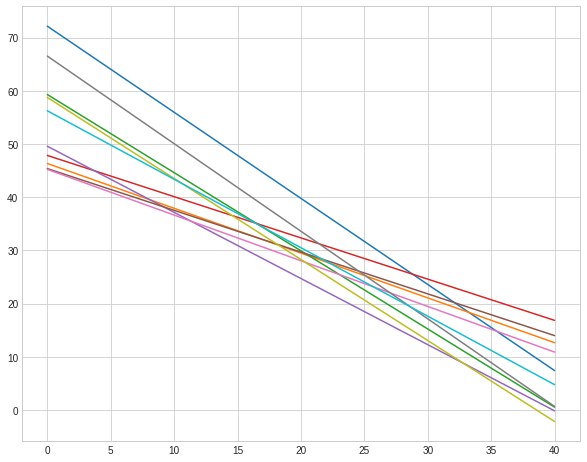

In [36]:
# TODO: sämtliche Fits visualisieren
plt.figure(figsize=(10, 8))
for model in models:
    visualize_fit(model)

## 4. Komplexität variieren

In diesem Abschnitt variieren wir die sogenannte **Komplexität** des Modells. Dies tun wir, in dem wir eine Feature Expansion durchführen. Der *Grad* dieser Expansion kann variiert werden

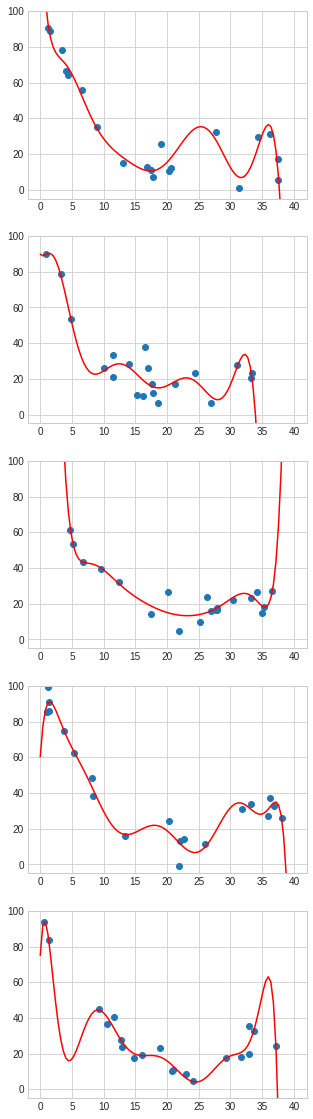

In [6]:
# Anzahl der Wiederholungen der Stichprobe
n_runs = 5

# Grad der Expansion
degree = 10

# TODO: Modelle für lineare Regression mit Expansion erstellen
models = []
for run in range(n_runs):
    new_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression(normalize=True)
    )
    models.append(new_model)

# für Stabilität
# plt.close("all")

# neuer Graph
fig = plt.figure(
    figsize=(5, n_runs*4)
)

# Verschiedene Trainingsdaten
for run in range(n_runs):
    model = models[run]
    
    # TODO: Daten generieren
    x_sample, y_sample = generate_data()
    
    # TODO: Modell fitten
    model.fit(x_sample, y_sample)
    
    # TODO: Subplot aufrufen
    plt.subplot(n_runs, 1, run + 1)
    
    # TODO Scatterplot
    plt.scatter(x_sample, y_sample)
    
    # TODO: Fit des Modells visualisieren
    visualize_fit(model, color="red")
    
    
    plt.ylim(-5, 100)

(-5.0, 100.0)

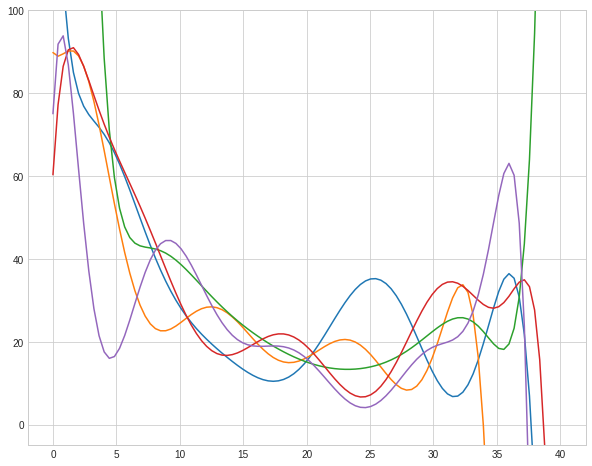

In [7]:
# TODO: sämtliche Fits visualisieren
plt.figure(figsize=(10, 8))
for model in models:
    visualize_fit(model)
plt.ylim(-5, 100)

## 5. Anzahl der Datenpunkte und Komplexität variieren

In diesem Abschnitt untersuchen wir, wie die **Komplexität** eines Modells mit der Anzahl der Datenpunkt interagiert.

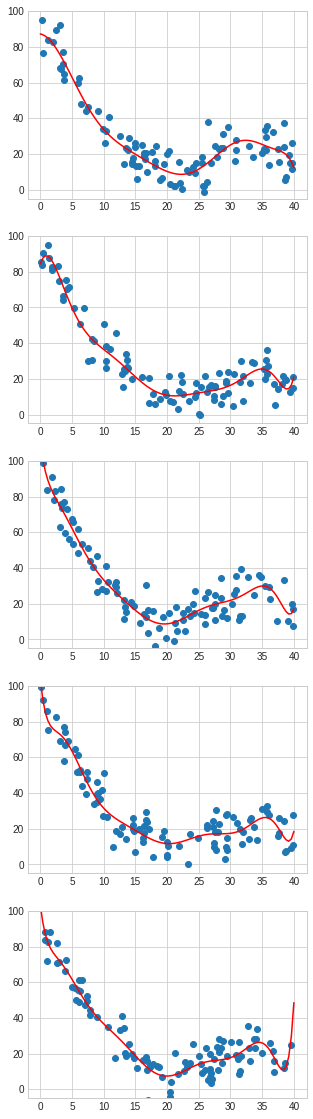

In [17]:
# Anzahl der Wiederholungen der Stichprobe
n_runs = 5
n_samples = 100

# Grad der Expansion
degree = 10

# TODO: Modelle für lineare Regression erstellen
models = []
for run in range(n_runs):
    new_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression(normalize=True)
    )
    models.append(new_model)

# für Stabilität
plt.close("all")

# neuer Graph
fig = plt.figure(
    figsize=(5, n_runs*4)
)

# Verschiedene Trainingsdaten
for run in range(n_runs):
    model = models[run]
    
    # TODO: Daten generieren
    x_sample, y_sample = generate_data(n_samples=n_samples)
    
    # TODO: Modell fitten
    model.fit(x_sample, y_sample)
    
    # TODO: Subplot aufrufen
    plt.subplot(n_runs, 1, run + 1)
    
    # TODO Scatterplot
    plt.scatter(x_sample, y_sample)
    
    # TODO: Fit des Modells visualisieren
    visualize_fit(model, color="red")
    
    plt.ylim(-5, 100)

(-5.0, 100.0)

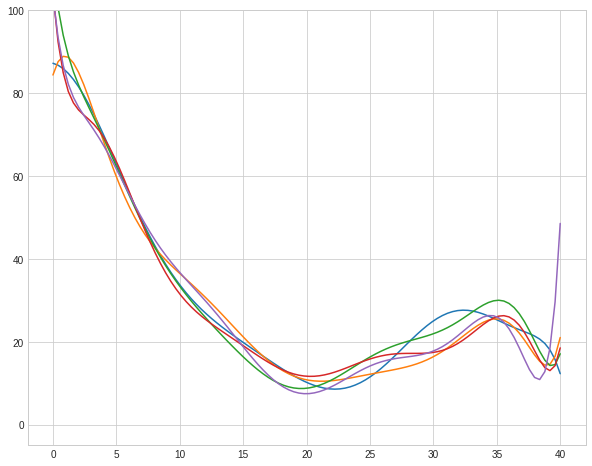

In [18]:
# TODO: sämtliche Fits visualisieren
plt.figure(figsize=(10, 8))
for model in models:
    visualize_fit(model)
plt.ylim(-5, 100)

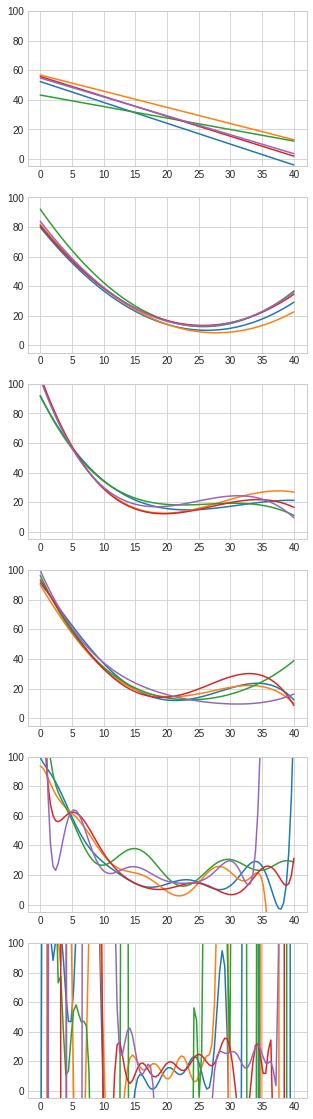

In [28]:
degrees = [1, 2, 3, 4, 10, 20]
n_runs = 5
n_samples = 20

# neuer Graph
fig = plt.figure(
    figsize=(5, n_runs*4)
)

for i, degree in enumerate(degrees):
    # TODO: Subplot aufrufen
    plt.subplot(len(degrees), 1, i + 1)
    plt.ylim(-5, 100)
    
    
    models = []
    for run in range(n_runs):
        new_model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            LinearRegression(normalize=True)
        )
        models.append(new_model)
    
    # Verschiedene Trainingsdaten
    for run in range(n_runs):
        model = models[run]

        # TODO: Daten generieren
        x_sample, y_sample = generate_data(n_samples=n_samples)

        # TODO: Modell fitten
        model.fit(x_sample, y_sample)



        # TODO: Fit des Modells visualisieren
        visualize_fit(model)

        